
# TASK 1: Introduction

***


## **Dataset Descriptions**

### SYNTHETIC CIRCLES:

The **Synthetic Circle dataset** contains **10,000 points** arranged into **100 circular clusters**, each with 100 points.
Each data point has two numeric coordinates, `x` and `y`,and a **class label** that indicates which circle it belongs to.

* **Features:**

  * `x` → X-coordinate (continuous)
  * `y` → Y-coordinate (continuous)

* **Target:**

  * `class` → Integer label for the circle (0–99)

This dataset is mainly used to test how well **clustering algorithms** can identify circular or non-linear groupings.


**What “conflicting” means**

In this context, **“conflicting”** usually refers to **overlapping or hard-to-separate clusters**,
that is, when points from different circles lie close to each other or overlap in space.

Such conflicts make it **difficult for a clustering algorithm** to clearly distinguish which circle a point belongs to.


### BANK MARKETING:

The **Bank Marketing dataset** contains **45,211 records** from a Portuguese banking institution’s **direct marketing campaigns** conducted over phone calls.
The goal is to predict whether a client will **subscribe to a term deposit** (the target variable `y`).

Each record corresponds to one client and contains **demographic information**, **financial indicators**, and **campaign-related details**.

* **Features:**

  * `age` → Client’s age (integer)
  * `job` → Type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
  * `marital` → Marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
  * `education` → Level of education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')	
  * `default` → Whether the client has credit in default (binary: yes/no)
  * `balance` → Average yearly balance in euros (integer)
  * `housing` → Has a housing loan? (binary: yes/no)
  * `loan` → Has a personal loan? (binary: yes/no)
  * `contact` → Communication type (categorical: cellular, telephone)
  * `day` → Last contact day of the month (integer 1–31)
  * `month` → Last contact month of the year (categorical: jan–dec)
  * `duration` → Duration of last contact in seconds (integer). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  * `campaign` → 	number of contacts performed during this campaign and for this client (numeric, includes last contact)
  * `pdays` → Days since last contact from a previous campaign (integer; -1 means *not previously contacted*)
  * `previous` → Number of contacts before this campaign (integer)
  * `poutcome` → Outcome of previous marketing campaign (categorical: 'failure','nonexistent','success')


* **Target:**

  * `y` → Whether the client subscribed to a term deposit (binary: yes/no)


This dataset combines **categorical and numerical features**, making it well-suited for testing **mixed-type preprocessing** and **unsupervised learning** methods such as clustering.


**What “conflicting” means**

In this context, **“conflicting”** refers to **clients with similar attributes but opposite outcomes**—for instance, two people with nearly identical profiles where one subscribed (`y = yes`) and the other did not (`y = no`).

Such conflicts highlight the **complexity and overlap** in behavioral and financial data, making it **challenging for clustering algorithms** to form clearly separated groups.

A key challenge was that the target variable (y) was highly imbalanced, containing: (shown later)

* “no” → 39922 records
* “yes” → 5289 records


## **Objective**
To apply and compare clustering algorithms on two real-world and synthetic datasets, explore the impact of dimensionality reduction on clustering performance, and develop skills in data preprocessing, visualization, and interpretation of results.

# SYNTHETIC CIRCLES

***

## TASK 2: Exploratory Data Analysis (EDA)

***



In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df2: bank-full.csv is the correct one since its dimension matches with the assignment

In [30]:
circles = pd.read_csv('circles.csv')
bank = pd.read_csv('bank-full.csv', sep=';')

In [32]:
circles.head()

,x,y,class
0,3.15676,116.12252,6
1,16.14436,16.81660,11
2,100.31212,64.99025,53
3,-1.33773,84.81772,4
4,104.37328,62.42373,53


In [33]:
# Shape of dataset
print("\nShape of dataset:", circles.shape)

# Summary info
print("Dataset Info:")
circles.info()



Shape of dataset: (10000, 3)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10000 non-null  float64
 1   y       10000 non-null  float64
 2   class   10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [34]:
print("\nMissing values count per column:")
print(circles.isnull().sum())


Missing values count per column:
x        0
y        0
class    0
dtype: int64


In [35]:
#Statistics of the dataset
circles.describe()

,x,y,class
count,10000.000000,10000.000000,10000.000000
mean,89.981670,90.003827,49.500000
std,57.457467,57.559719,28.867513
min,-5.000000,-4.999860,0.000000
25%,40.237885,40.133840,24.750000
50%,89.999995,90.000080,49.500000
75%,139.898800,139.977695,74.250000
max,184.999920,185.000000,99.000000


In [36]:
print("Column Data Types:\n")
print(circles.dtypes)
print("\nUnique classes:", circles['class'].nunique())
print("Classes range from", circles['class'].min(), "to", circles['class'].max())


Column Data Types:

x        float64
y        float64
class      int64
dtype: object

Unique classes: 100
Classes range from 0 to 99


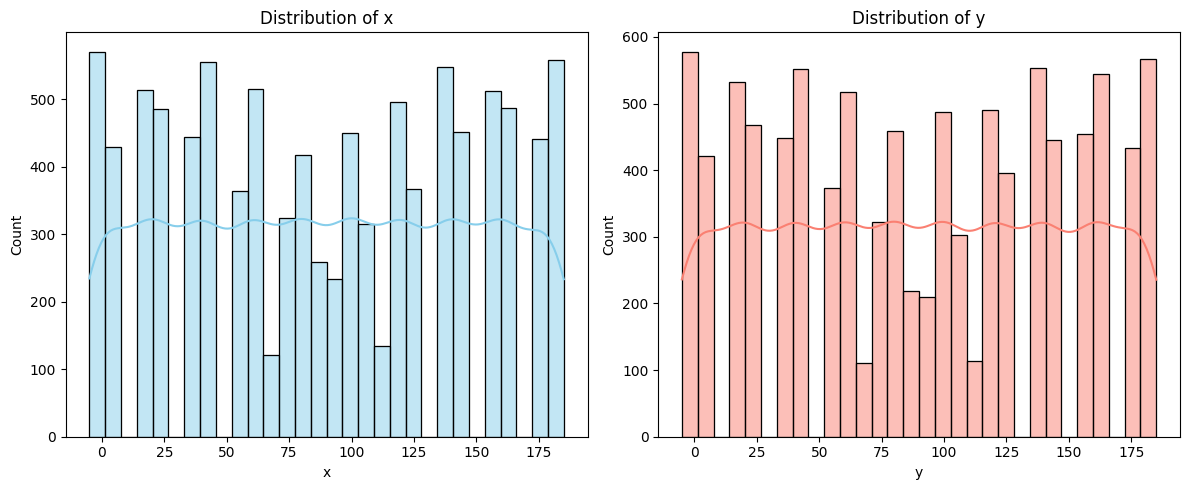

In [37]:
# Distribution of x and y
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(circles['x'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of x")

sns.histplot(circles['y'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Distribution of y")

plt.tight_layout()
plt.show()


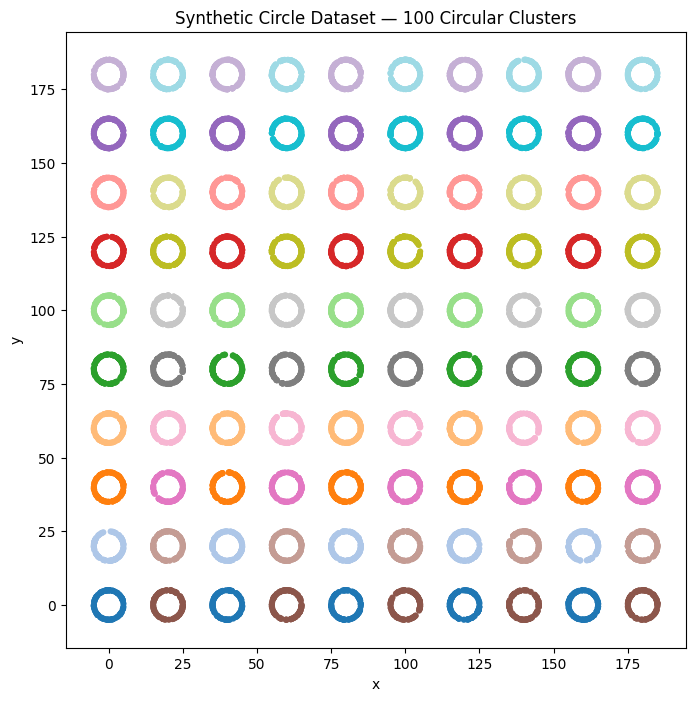

In [38]:
#Visualising Circles through scatterplot
plt.figure(figsize=(8, 8))
sns.scatterplot(data=circles, x='x', y='y', hue='class', palette='tab20', s=20, linewidth=0)
plt.title("Synthetic Circle Dataset — 100 Circular Clusters")
plt.legend([],[], frameon=False)  # hide legend if too many classes
plt.show()


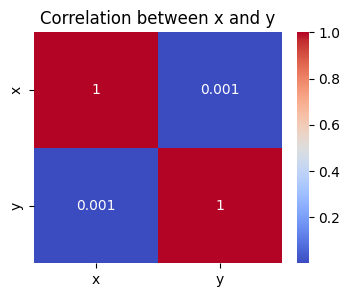

In [ ]:
#Correlation Analysis
c_corr = circles[['x', 'y']].corr()

# Heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(c_corr, annot=True, cmap='coolwarm')
plt.title("Correlation between x and y")
plt.show()


In [40]:
#Data Quality Analysis

# Duplicate rows
print("Number of duplicate rows:", circles.duplicated().sum())

# Check for any extreme values (potential outliers)
print("\nExtreme x values:", circles['x'].min(), "to", circles['x'].max())
print("Extreme y values:", circles['y'].min(), "to", circles['y'].max())


Number of duplicate rows: 0

Extreme x values: -5.0 to 184.99992
Extreme y values: -4.99986 to 185.0


### Observations made through EDA


* 10,000 samples, 2 continuous features (x, y), and 1 target variable (class)

* No missing or duplicate values

* 'x' and 'y' are evenly distributed across a wide range

* 100 balanced classes (each circle has 100 points)

* Correlation between x and y ≈ 0 (non-linear pattern)

* Visualization confirms 100 circular clusters, with slight overlaps (conflicts) between neighboring circles

* Dataset is clean and suitable for clustering experiments


]



***

## TASK 3: Preprocessing

***

In [54]:
import sklearn
print(sklearn.__version__)

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

# Evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score

1.5.2


* The dataset has no missing values, so imputation or removal is not needed

In [55]:
# One-hot encode the 'class' column (optional)
circles_encoded = pd.get_dummies(circles, columns=['class'])
circles_encoded.head()


,x,y,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,...,class_90,class_91,class_92,class_93,class_94,class_95,class_96,class_97,class_98,class_99
0,3.15676,116.12252,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,16.14436,16.81660,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,100.31212,64.99025,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-1.33773,84.81772,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,104.37328,62.42373,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale x and y
circles[['x', 'y']] = scaler.fit_transform(circles[['x', 'y']])

# Check scaled values
circles.head()


,x,y,class
0,-1.511192,0.453790,6
1,-1.285142,-1.271564,11
2,0.179802,-0.434589,53
3,-1.589419,-0.090104,4
4,0.250487,-0.479180,53


In [57]:
circles['distance_from_origin'] = np.sqrt(circles['x']**2 + circles['y']**2)


* Feature selection not needed since there are only 2 features
* Sampling / Undersampling is not needed since dataset is balanced across classes.

*** 

## TASK 4: Clustering Methods

***

In [ ]:
#Scaling features

scaler = StandardScaler()
circles[['x', 'y']] = scaler.fit_transform(circles[['x', 'y']])



#### __Method 1: K-Means Clustering__
_Step 1a_: Choose Hyperparameters

* n_clusters = 100 → because the dataset has 100 circles

* init = 'k-means++' → good default initialization

* random_state = 42 → for reproducibility

In [ ]:
kmeans = KMeans(n_clusters=100, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(circles[['x', 'y']])


_Step 1b_: Visualize Clusters

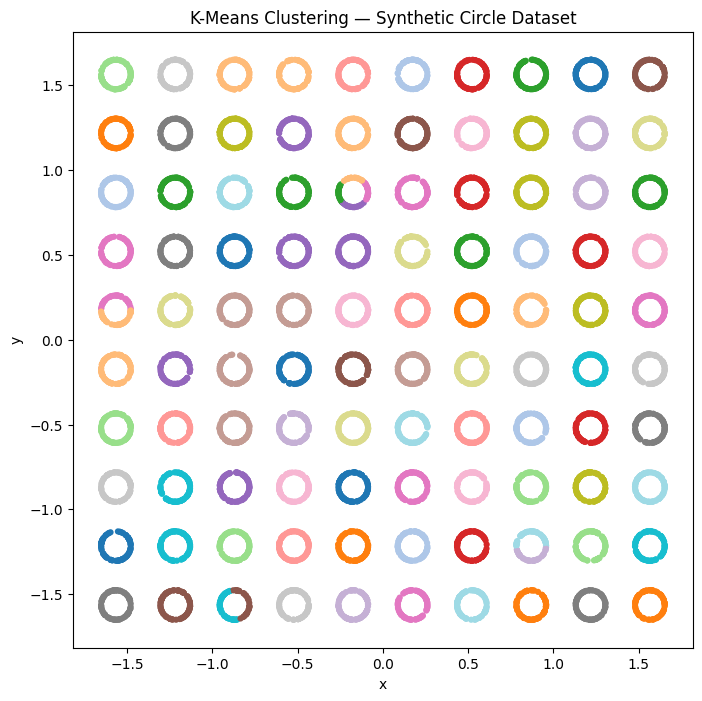

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=circles['x'], y=circles['y'], hue=kmeans_labels, palette='tab20', s=20, linewidth=0)
plt.title("K-Means Clustering — Synthetic Circle Dataset")
plt.legend([], [], frameon=False)  # Hide legend for clarity
plt.show()


_Step 1c_: Evaluate Clusters

In [ ]:
sil_score = silhouette_score(circles[['x', 'y']], kmeans_labels)
db_score = davies_bouldin_score(circles[['x', 'y']], kmeans_labels)

print("K-Means Silhouette Score:", sil_score)
print("K-Means Davies-Bouldin Index:", db_score)


K-Means Silhouette Score: 0.5901229433934572
K-Means Davies-Bouldin Index: 0.5469307901035957


*** 

## TASK 5: Dimensionality Reduction

***

*** 

## TASK 6: Clustering After Dimensionality Reduction

***

*** 

## TASK 7: Comparison and Discussion

***

*** 

## TASK 8: Conclusion

***

# BANK MARKETING

***
## TASK 2: Exploratory Data Analysis (EDA)

Since we had already lodged our dataset in the "bank" variable for ease, let us proceed with it's EDA. 

In [ ]:
bank.head()

In [ ]:
print("Dataset Info:") 
bank.info()

In [ ]:
print("\nMissing values count per column:") 
print(bank.isnull().sum())

print("\n Count in our target variable:") 
print(bank['y'].value_counts())

There are no missing values but our responses are imbalanced. 

In [ ]:
# ['default', 'housing', 'loan', 'y'] are the binary columns. 

for col in ['default', 'housing', 'loan', 'y']:
    bank[col] = bank[col].map({'yes': 1, 'no': 0}).astype('int64')
print(bank.head())


In [ ]:
#Statistics of the dataset 
bank.describe()

In [ ]:
bank.duplicated().sum()

In [ ]:
print(bank.dtypes)

In [ ]:
cat_bank = []
for col in bank.select_dtypes(include=['object']).columns:
    cat_bank.append(col)

num_bank = []
for col in bank.select_dtypes(include=['int64']).columns:
    num_bank.append(col)

In [ ]:
# Define subplot grid
rows, cols = 4, 3
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
axes = axes.flatten()

# Plot each categorical column
for i, col_name in enumerate(cat_bank):
    sns.countplot(data=bank, x=bank[col_name], ax=axes[i], palette="viridis", hue='y')
    axes[i].set_title(f"{col_name} Distribution", fontsize=12)
    axes[i].tick_params(axis="x", rotation=60)

# Remove unused axes if cat_cols < rows*cols
for j in range(len(cat_bank), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
b_corr = bank[num_bank].corr()

# Plot heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(b_corr, annot=True, fmt=".2f", cmap="RdBu_r", center=0, cbar=True)

plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

We notice stronger positive correlation between pdays and previous; balance and age; and lastly, day and campaign. 

Observing the correlation with our target variable, positive (duration, pdays, previous) and negative(housing, campaign, loan)

In [ ]:
b_cols = ['age', 'duration', 'balance', 'day', 'pdays', 'campaign']

# Set up grid: 7 rows × 2 columns
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 18))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(b_cols):
    sns.histplot(bank[col], bins=30, kde=False, color="skyblue", ax=axes[i])
    axes[i].set_title(f"{col.capitalize()} Histogram", fontsize=12)
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("Count")

# Remove unused subplots if there are any
for j in range(len(b_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:

binary_cols = ['default', 'housing', 'loan', 'y']

# Set up subplots
fig, axes = plt.subplots(1, len(binary_cols), figsize=(15, 5))

# Plot count plots for each binary column
for i, col in enumerate(binary_cols):
    sns.countplot(x=bank[col], ax=axes[i], color="pink")
    axes[i].set_title(f"{col.capitalize()} Distribution", fontsize=12)
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("Count")

    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{int(height)}', 
                         xy=(p.get_x() + p.get_width() / 2, height),
                         ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()


In [ ]:

# List of numeric columns to plot
num1_bank = ['age', 'duration', 'balance', 'day', 'pdays', 'campaign']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(num1_bank):
    sns.boxplot(data=bank, x='y', y=col, ax=axes[i], color='violet')
    axes[i].set_title(f"{col.capitalize()} by Term Deposit (y)", fontsize=12)
    axes[i].set_xlabel("Subscribed (y)")
    axes[i].set_ylabel(col.capitalize())

# Remove unused subplots if any
for j in range(len(num1_bank), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Observations made through EDA


***
## TASK 3: Preprocessing


For outlier handling, Z-Score Method was used:

* Identified and removed data points that fell beyond ±3 standard deviations from the mean.
* This method focuses on standard deviation as a measure of dispersion.

In [ ]:
def count_outliers(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return ((col < lower) | (col > upper)).sum()

outliers_df = (
    bank[num_bank]
    .apply(count_outliers)
    .reset_index()
    .rename(columns={'index': 'Column', 0: 'Outliers_Count'})
    .sort_values(by="Outliers_Count", ascending=False)
    .reset_index(drop=True)
)
outliers_df

In [ ]:
from scipy import stats
df_zscore = bank.copy()

z = np.abs(stats.zscore(df_zscore[num_bank], nan_policy='omit'))
df_zscore = df_zscore[(z < 3).all(axis=1)]

print("Shape before:", bank.shape)
print("Shape after cleaning (Z-score):", df_zscore.shape)

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 12))
axes = axes.flatten()

# Plot each boxplot with Seaborn
for i, col in enumerate(num_bank):
    sns.boxplot(data=df_zscore, x=df_zscore[col], ax=axes[i])
    axes[i].set_title(f"{col} Boxplot", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel(col)

# Remove unused subplots if num_cols < rows*cols
for j in range(len(num_bank), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

*** 

## TASK 4: Clustering Methods

***

*** 

## TASK 5: Dimensionality Reduction

***

*** 

## TASK 6: Clustering After Dimensionality Reduction

***

*** 

## TASK 7: Comparison and Discussion

***

*** 

## TASK 8: Conclusion

***


***
# TASK 9: References

### Banking:

* For variable descriptions: https://archive.ics.uci.edu/dataset/222/bank+marketing